Data type of spacing column: <class 'str'>


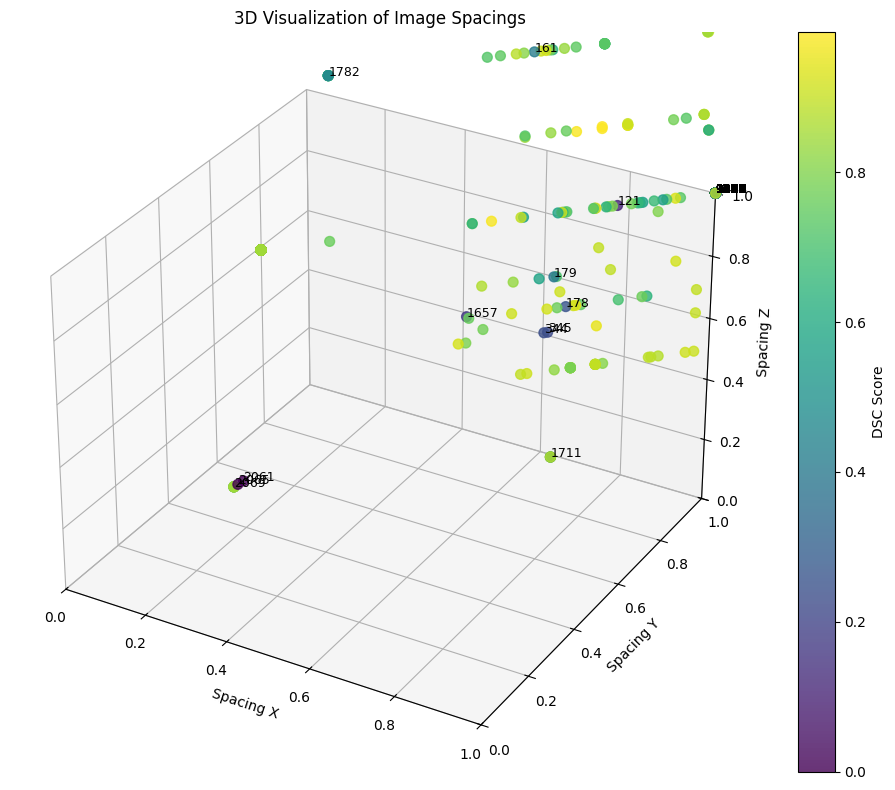

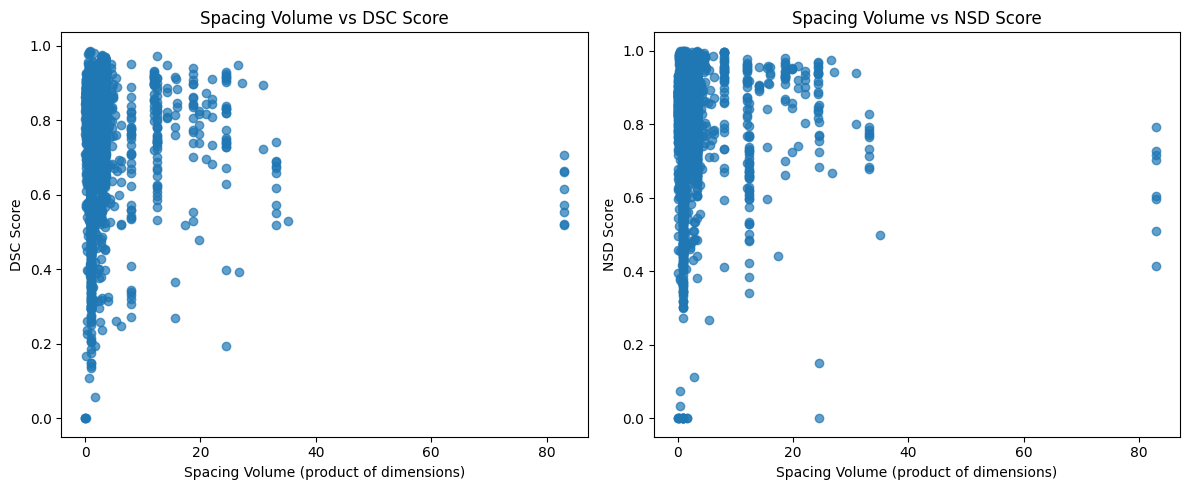

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import re

def parse_spacing_string(spacing_str):
    # Extract numbers using regex
    numbers = re.findall(r"[-+]?\d*\.\d+|\d+", spacing_str)
    # Convert to float and create numpy array
    return np.array([float(num) for num in numbers])

# Load the data from CSV
df = pd.read_csv('segmentation_metrics_results.csv')

# The spacing column likely contains string representations of arrays like "[0.5, 0.5, 1.0]"
# We need to convert these strings to actual arrays
# First, check the type of the spacing column
print("Data type of spacing column:", type(df['spacing'].iloc[0]))

# If spacing is stored as string, convert it to numpy arrays
if isinstance(df['spacing'].iloc[0], str):
    df['spacing'] = df['spacing'].apply(lambda x: parse_spacing_string(x))

# Extract x, y, z components of spacing
x = np.array([s[0] for s in df['spacing']])
y = np.array([s[1] for s in df['spacing']])
z = np.array([s[2] for s in df['spacing']])

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Add color based on DSC score for additional insight
scatter = ax.scatter(x, y, z, c=df['dsc'], cmap='viridis', s=50, alpha=0.8)

# Add labels and title
ax.set_xlabel('Spacing X')
ax.set_ylabel('Spacing Y')
ax.set_zlabel('Spacing Z')
ax.set_title('3D Visualization of Image Spacings')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

# Add a color bar to show DSC values
cbar = plt.colorbar(scatter)
cbar.set_label('DSC Score')

# Add annotations for points with extreme values
threshold = np.percentile(df['dsc'], 10)  # Bottom 10% of DSC scores
for i, (xi, yi, zi, dsci) in enumerate(zip(x, y, z, df['dsc'])):
    if dsci < threshold:
        ax.text(xi, yi, zi, f"{i}", fontsize=9)

plt.tight_layout()
plt.show()

# Let's also create a plot to see if there's a relationship between spacing and DSC/NSD
plt.figure(figsize=(12, 5))

# Calculate spacing volume (product of dimensions)
df['spacing_volume'] = np.array([np.prod(s) for s in df['spacing']])

# Plot 1: Spacing volume vs DSC
plt.subplot(1, 2, 1)
plt.scatter(df['spacing_volume'], df['dsc'], alpha=0.7)
plt.xlabel('Spacing Volume (product of dimensions)')
plt.ylabel('DSC Score')
plt.title('Spacing Volume vs DSC Score')

# Plot 2: Spacing volume vs NSD
plt.subplot(1, 2, 2)
plt.scatter(df['spacing_volume'], df['nsd'], alpha=0.7)
plt.xlabel('Spacing Volume (product of dimensions)')
plt.ylabel('NSD Score')
plt.title('Spacing Volume vs NSD Score')

plt.tight_layout()
plt.show()

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ast import literal_eval
import plotly.express as px
import plotly.graph_objects as go

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ast import literal_eval
import plotly.express as px
import plotly.graph_objects as go



# If spacing is stored as string, convert it to numpy arrays
if isinstance(df['spacing'].iloc[0], str):
    df['spacing'] = df['spacing'].apply(lambda x: parse_spacing_string(x))

# Extract x, y, z components of spacing
x = np.array([s[0] for s in df['spacing']])
y = np.array([s[1] for s in df['spacing']])
z = np.array([s[2] for s in df['spacing']])

# Calculate spacing volume (product of dimensions)
df['spacing_volume'] = np.array([np.prod(s) for s in df['spacing']])

# Create interactive 3D scatter plot with Plotly
fig = px.scatter_3d(
    x=x, y=y, z=z, 
    color=df['dsc'], 
    opacity=0.8,
    color_continuous_scale=px.colors.sequential.Viridis,
    labels={'color': 'DSC Score'},
    title='Interactive 3D Visualization of Image Spacings',
    size_max=10
)

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title='Spacing X',
        yaxis_title='Spacing Y',
        zaxis_title='Spacing Z',
        # Set axis limits if needed
        xaxis=dict(range=[0, 4]),
        yaxis=dict(range=[0, 4]),
        zaxis=dict(range=[0, 4]),
    ),
    width=900,
    height=700,
    margin=dict(r=20, l=10, b=10, t=30)
)


DataFrame columns:
Index(['filename', 'dsc', 'nsd', 'spacing', 'shape', 'spacing_volume'], dtype='object')

First few rows of the DataFrame:
                filename       dsc       nsd                        spacing  \
0  CT_AMOS_amos_0018.npz  0.799943  0.894802  [0.84600002, 0.84600002, 5.0]   
1  CT_AMOS_amos_0021.npz  0.808432  0.904383  [0.89200002, 0.89200002, 5.0]   
2  CT_AMOS_amos_0033.npz  0.839440  0.929304  [0.78200001, 0.78200001, 5.0]   
3  CT_AMOS_amos_0043.npz  0.784436  0.895481  [0.84299999, 0.84299999, 5.0]   
4  CT_AMOS_amos_0044.npz  0.759070  0.845141    [0.5078125, 0.5078125, 5.0]   

            shape  spacing_volume  
0  (63, 512, 512)        3.578580  
1  (88, 512, 512)        3.978320  
2  (67, 512, 512)        3.057620  
3  (46, 512, 512)        3.553245  
4  (87, 768, 768)        1.289368  


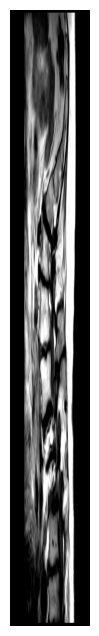

DSC: 0.000
Spacing: (0.08326023, 3.35763193, 0.625)
Shape: (28, 3473, 448)
File: MR_Spider_186_t1_vet.npz


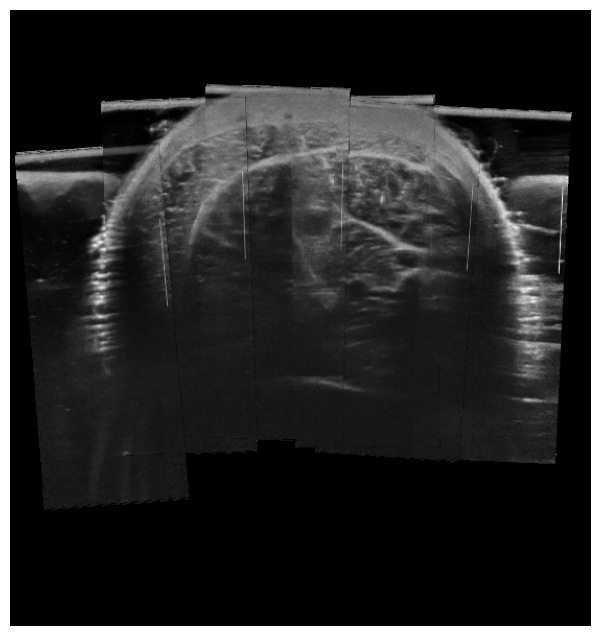

DSC: 0.000
Spacing: (0.27491, 0.27491, 0.27491)
Shape: (1456, 590, 556)
File: US_Low-limb-Leg11.npz


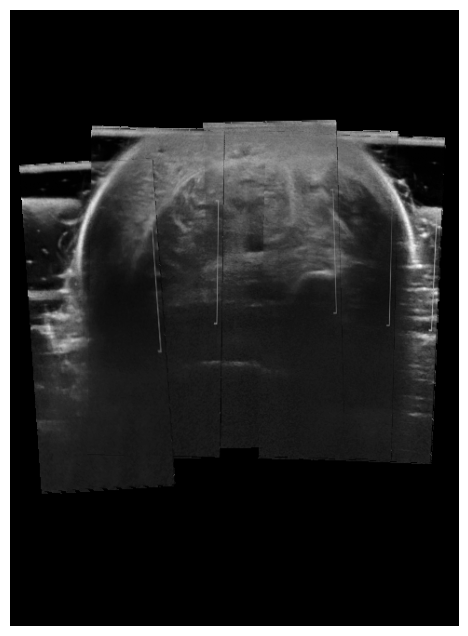

DSC: 0.000
Spacing: (0.266094, 0.266094, 0.266094)
Shape: (1417, 662, 482)
File: US_Low-limb-Leg19.npz


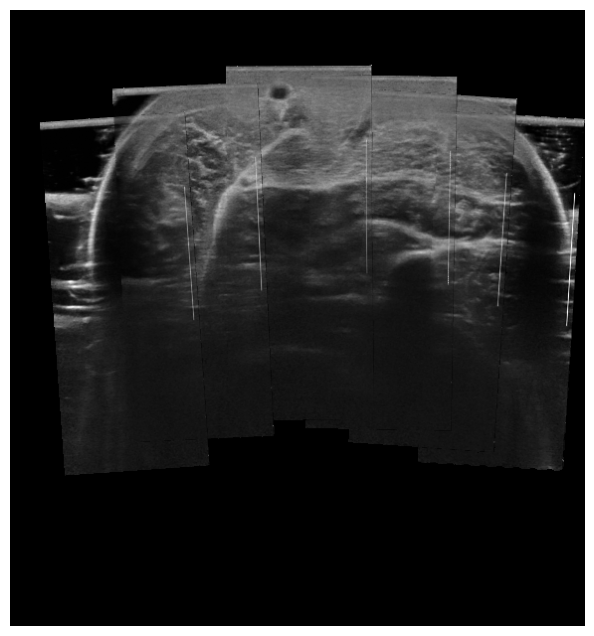

DSC: 0.000
Spacing: (0.25999999, 0.25999999, 0.25999999)
Shape: (1119, 620, 578)
File: US_Low-limb-Leg44.npz


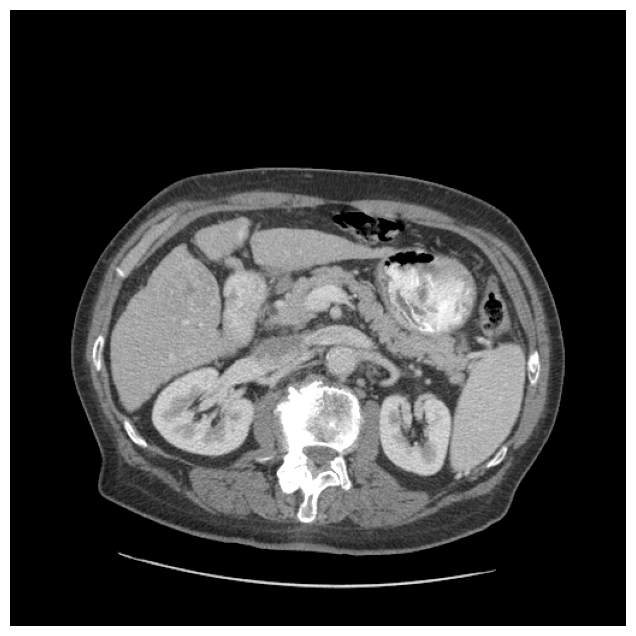

DSC: 0.057
Spacing: (0.82031202, 0.82031202, 2.5)
Shape: (18, 512, 512)
File: CT_AbdTumor_HCC_086.npz


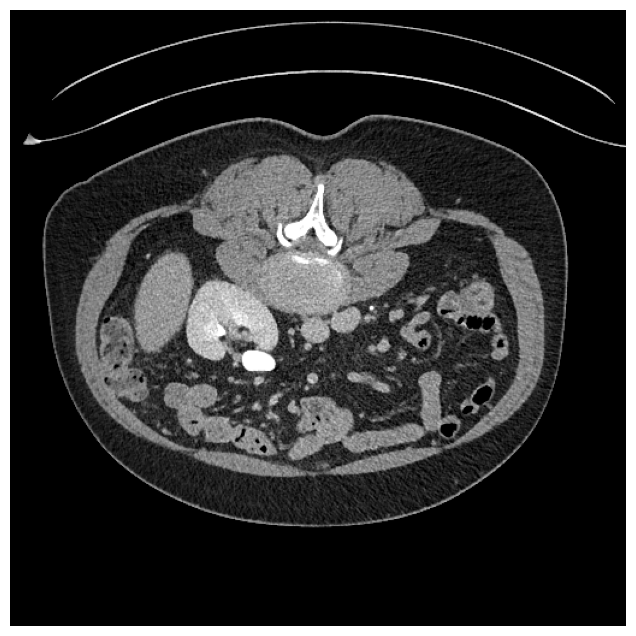

DSC: 0.108
Spacing: (0.84765625, 0.84765625, 1.0)
Shape: (42, 512, 512)
File: CT_AbdTumor_case_00517.npz


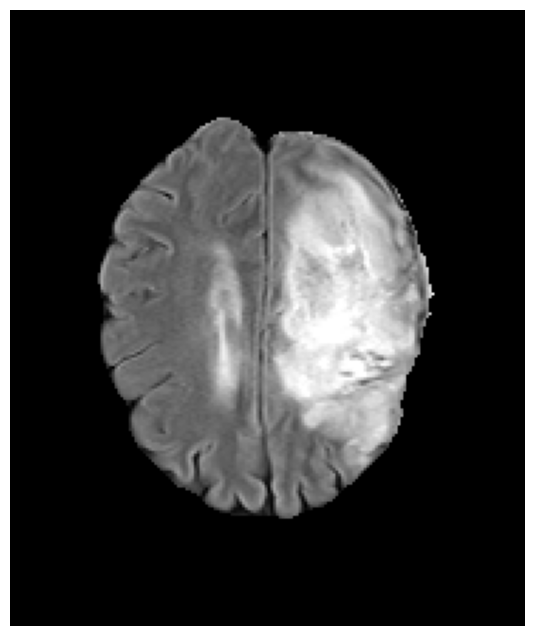

DSC: 0.136
Spacing: (1.0, 1.0, 1.0)
Shape: (80, 218, 182)
File: MR_BraTS-T2f_bratsgli_0385.npz


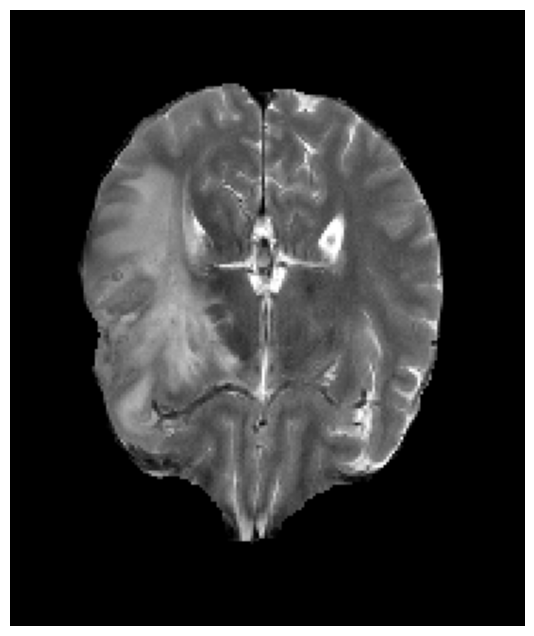

DSC: 0.140
Spacing: (1.0, 1.0, 1.0)
Shape: (70, 218, 182)
File: MR_BraTS-T2w_bratsgli_0598.npz


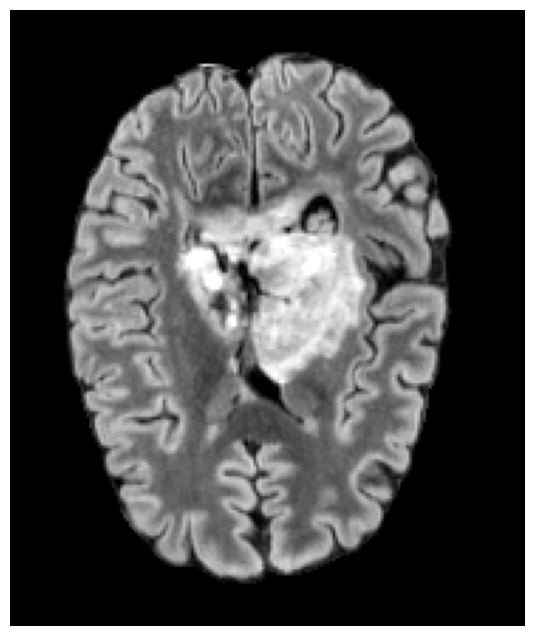

DSC: 0.148
Spacing: (1.0, 1.0, 1.0)
Shape: (62, 218, 182)
File: MR_BraTS-T2f_bratsgli_1124.npz


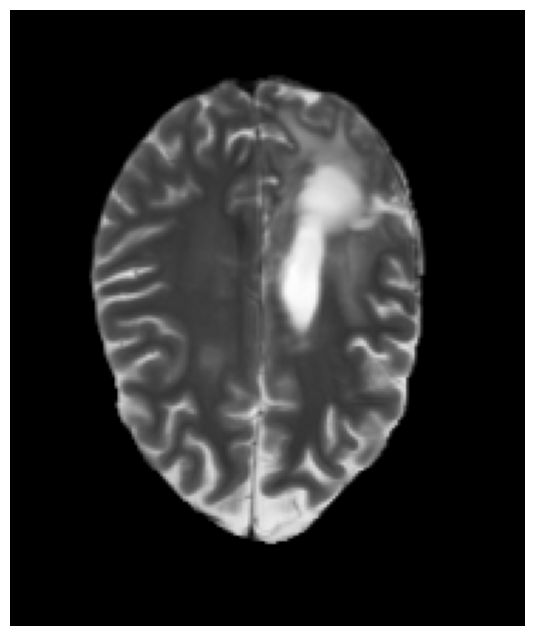

DSC: 0.149
Spacing: (1.0, 1.0, 1.0)
Shape: (77, 218, 182)
File: MR_BraTS-T2w_bratsgli_1133.npz


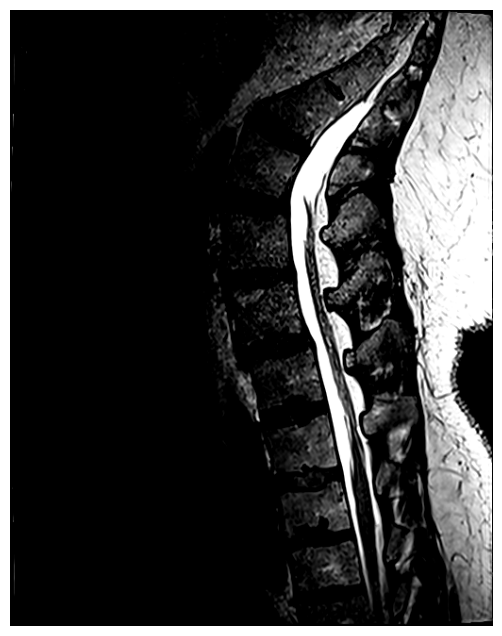

DSC: 0.169
Spacing: (0.46087829, 0.90405625, 0.46875)
Shape: (30, 653, 512)
File: MR_Spider_191_t2_SPACE_spi.npz


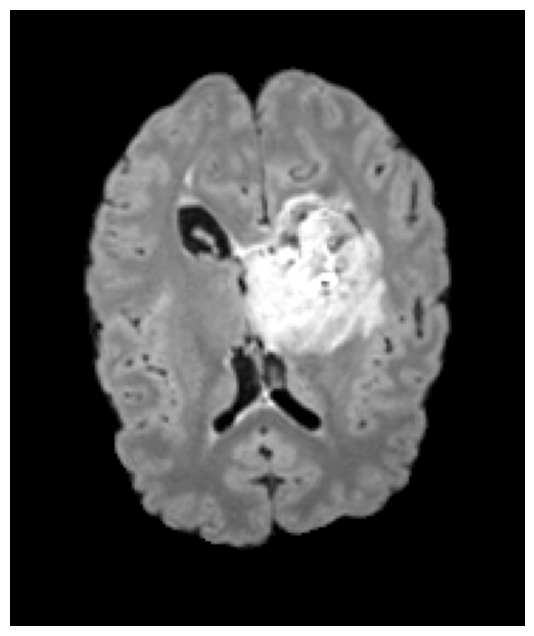

DSC: 0.174
Spacing: (1.0, 1.0, 1.0)
Shape: (60, 218, 182)
File: MR_BraTS-T2f_bratsgli_1347.npz


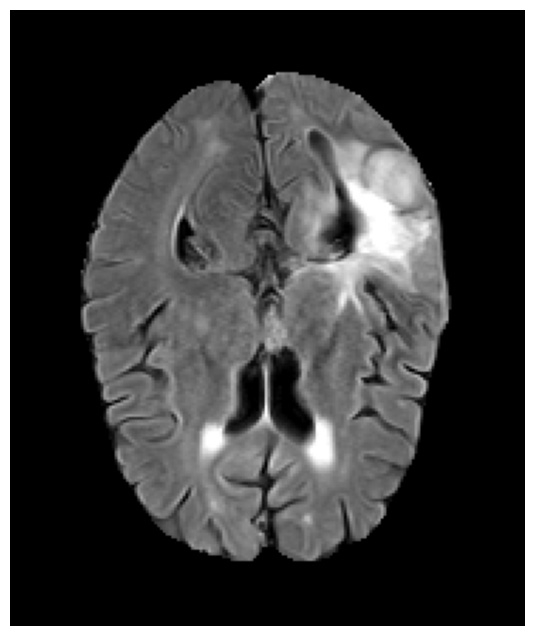

DSC: 0.186
Spacing: (1.0, 1.0, 1.0)
Shape: (60, 218, 182)
File: MR_BraTS-T2f_bratsgli_0366.npz


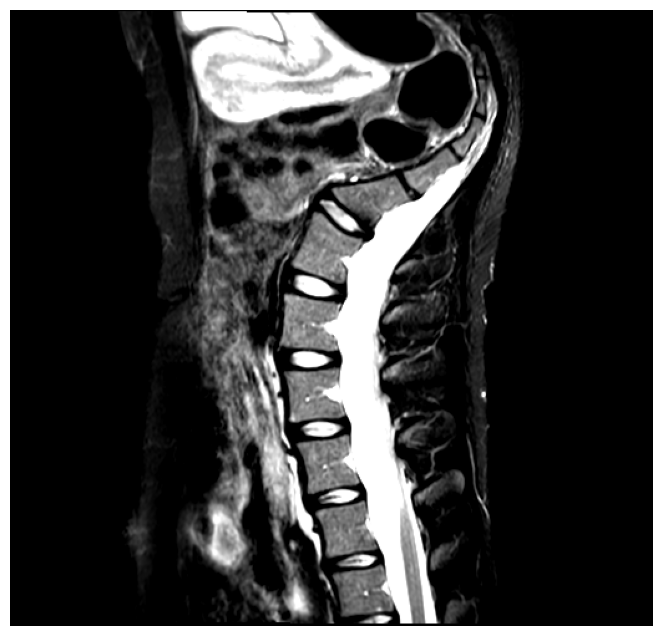

DSC: 0.194
Spacing: (0.62368965, 4.3964741, 0.59734362)
Shape: (7, 495, 516)
File: MR_Spider_237_t2_spi.npz


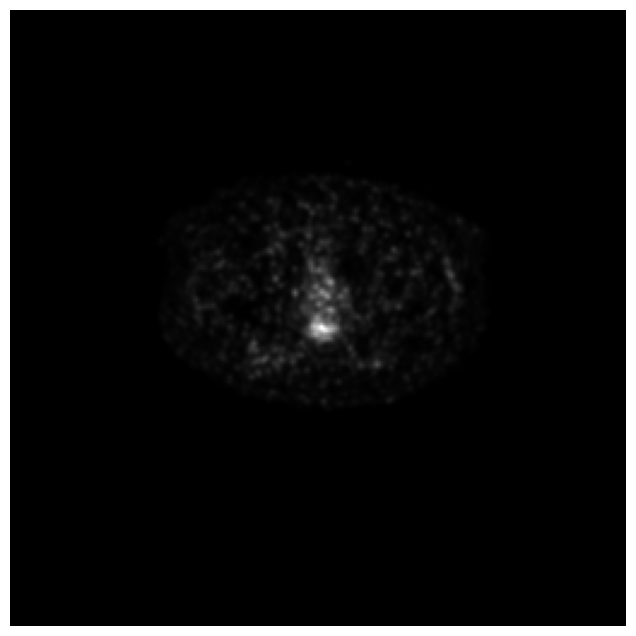

DSC: 0.194
Spacing: (2.734375, 2.734375, 3.26999998)
Shape: (36, 256, 256)
File: PET_autoPET_psma_a3c5675abaec3e1d_2017-08-14.npz


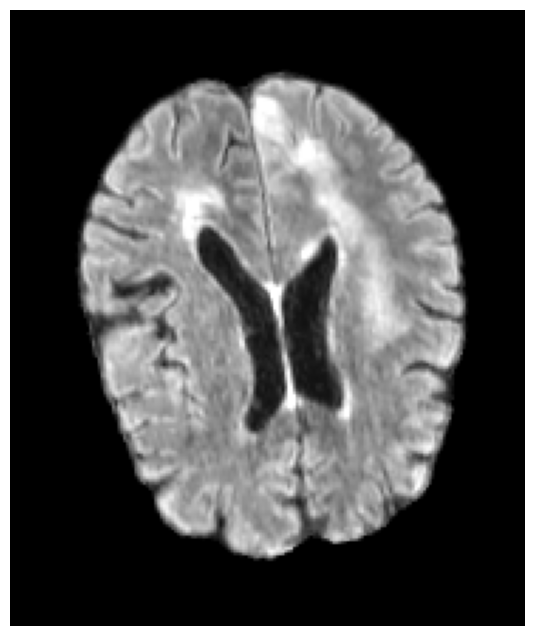

DSC: 0.204
Spacing: (1.0, 1.0, 1.0)
Shape: (79, 218, 182)
File: MR_BraTS-T2f_bratsgli_0835.npz


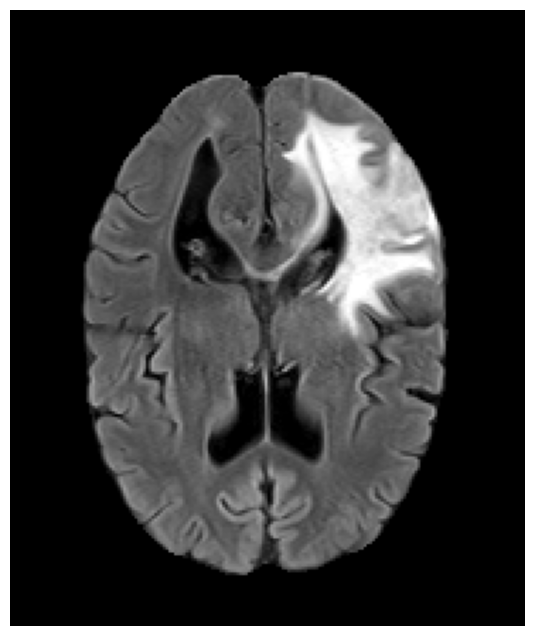

DSC: 0.208
Spacing: (1.0, 1.0, 1.0)
Shape: (82, 218, 182)
File: MR_BraTS-T2f_bratsgli_0151.npz


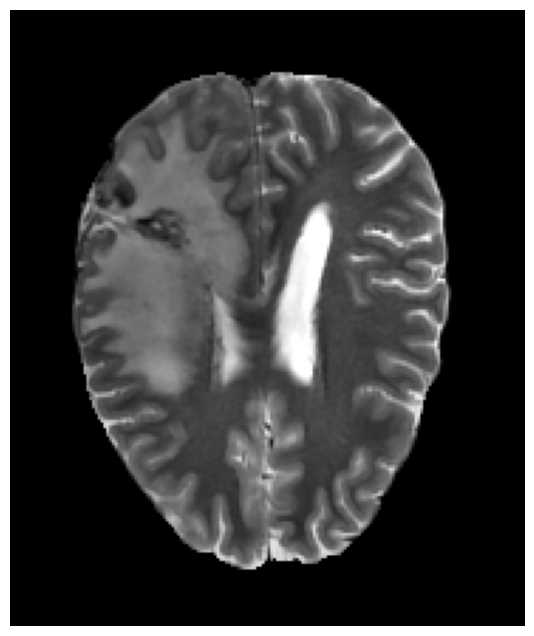

DSC: 0.209
Spacing: (1.0, 1.0, 1.0)
Shape: (104, 218, 182)
File: MR_BraTS-T2w_bratsgli_1050.npz


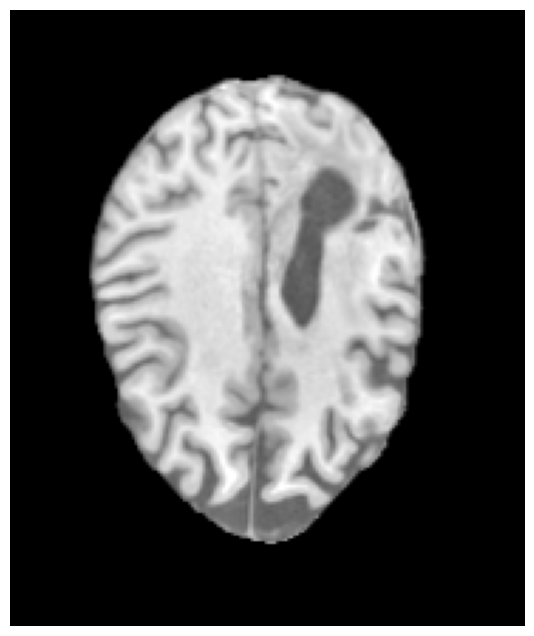

DSC: 0.217
Spacing: (1.0, 1.0, 1.0)
Shape: (77, 218, 182)
File: MR_BraTS-T1n_bratsgli_1133.npz


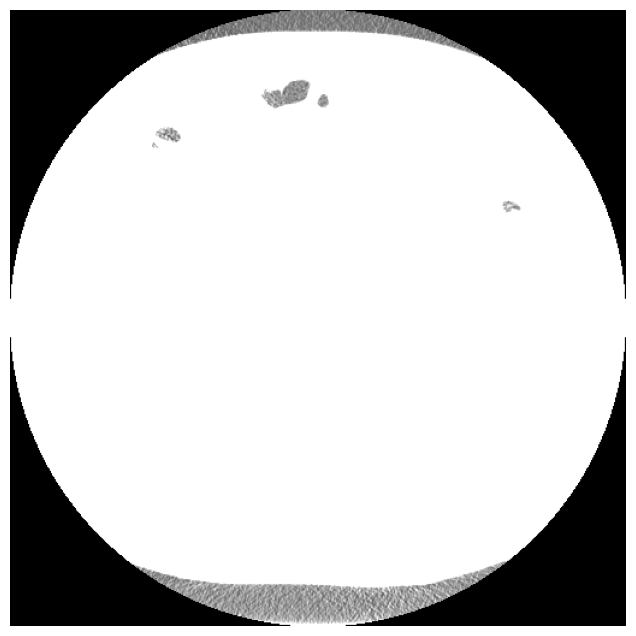

DSC: 0.226
Spacing: (0.74414098, 0.74414098, 0.625)
Shape: (1007, 512, 512)
File: CT_Aorta_AortaR9.npz


<Figure size 640x480 with 0 Axes>

In [22]:
from segfm3d_nora_team.src.viz_tools import save_volume_viz
import os 
# Sort by DSC and get lowest 10
worst_cases = df.nsmallest(20, 'dsc')


# Plot each case
for idx, (_, case) in enumerate(worst_cases.iterrows()):
    # Load the image
    img_filepath = os.path.join(img_dir, case['filename'])
    data = np.load(img_filepath)
    img = data["imgs"]
    
    save_volume_viz(img, show=True)


    
    # Add title with relevant info
    title = f"DSC: {case['dsc']:.3f}\n"
    title += f"Spacing: {tuple(case['spacing'])}\n"
    title += f"Shape: {img.shape}\n"
    title += f"File: {os.path.basename(case['filename'])}"
    #axes[idx].set_title(title, fontsize=8)
    print(title)
plt.tight_layout()
plt.show()
